In [19]:
# Import libraries
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from statsmodels.genmod.families import Binomial
from statsmodels.genmod.generalized_linear_model import GLM
from scipy.stats import fisher_exact
import scipy as sp
import statsmodels.api as sm
from statsmodels.gam.api import GLMGam, BSplines
import warnings

In [20]:
# Read train and validation data
train = pd.read_csv("/Users/jinwoolee/Downloads/Bank Project/insurance_t.csv")
val = pd.read_csv("/Users/jinwoolee/Downloads/Bank Project/insurance_v.csv")

In [21]:
# Establish number of rows and columns of train
nrow, ncol = train.shape

# First ten observations of train
train.head(10)

,ACCTAGE,DDA,DDABAL,DEP,DEPAMT,CASHBK,CHECKS,DIRDEP,NSF,NSFAMT,...,HMOWN,LORES,HMVAL,AGE,CRSCORE,MOVED,INAREA,INS,BRANCH,RES
0,0.7,1,1986.81,1,446.93,0,1,1,0,0.00,...,1.0,7.0,87.0,51.0,674.0,0,1,0,B2,R
1,4.1,0,0.00,0,0.00,0,0,0,0,0.00,...,1.0,8.5,97.0,60.0,640.0,0,1,1,B3,S
2,12.3,1,1069.78,5,6813.58,0,13,1,0,0.00,...,0.0,3.0,107.0,55.0,662.0,0,1,1,B7,U
3,0.8,1,190.03,3,880.25,0,1,0,1,5.65,...,0.0,4.0,107.0,40.0,642.0,0,1,0,B14,S
4,1.6,1,257.13,5,3408.35,0,14,0,1,60.25,...,1.0,8.5,95.0,54.0,732.0,0,1,0,B15,U
5,5.3,0,0.00,0,0.00,0,0,0,0,0.00,...,1.0,12.5,76.0,61.0,688.0,0,1,1,B19,R
6,9.0,1,1072.55,1,590.25,0,0,0,1,5.78,...,1.0,8.5,111.0,54.0,635.0,0,1,1,B15,R
7,4.0,0,0.00,0,0.00,0,0,0,0,0.00,...,1.0,3.5,99.0,46.0,642.0,0,1,1,B14,U
8,NaN,1,998.25,2,1471.81,0,4,1,0,0.00,...,1.0,8.0,129.0,22.0,626.0,0,1,1,B1,S
9,1.5,0,0.00,0,0.00,0,0,0,0,0.00,...,0.0,4.0,97.0,53.0,693.0,0,0,0,B18,R


# EDA

In [22]:
# Basic information
train.info()

train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8495 entries, 0 to 8494
Data columns (total 48 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ACCTAGE  7949 non-null   float64
 1   DDA      8495 non-null   int64  
 2   DDABAL   8495 non-null   float64
 3   DEP      8495 non-null   int64  
 4   DEPAMT   8495 non-null   float64
 5   CASHBK   8495 non-null   int64  
 6   CHECKS   8495 non-null   int64  
 7   DIRDEP   8495 non-null   int64  
 8   NSF      8495 non-null   int64  
 9   NSFAMT   8495 non-null   float64
 10  PHONE    7420 non-null   float64
 11  TELLER   8495 non-null   int64  
 12  SAV      8495 non-null   int64  
 13  SAVBAL   8495 non-null   float64
 14  ATM      8495 non-null   int64  
 15  ATMAMT   8495 non-null   float64
 16  POS      7420 non-null   float64
 17  POSAMT   7420 non-null   float64
 18  CD       8495 non-null   int64  
 19  CDBAL    8495 non-null   int64  
 20  IRA      8495 non-null   int64  
 21  IRABAL   8495 

,ACCTAGE,DDA,DDABAL,DEP,DEPAMT,CASHBK,CHECKS,DIRDEP,NSF,NSFAMT,...,SDB,INCOME,HMOWN,LORES,HMVAL,AGE,CRSCORE,MOVED,INAREA,INS
count,7949.000000,8495.000000,8495.000000,8495.000000,8495.000000,8495.000000,8495.000000,8495.000000,8495.000000,8495.000000,...,8495.000000,6958.000000,7032.000000,6958.000000,6958.000000,6793.000000,8300.000000,8495.000000,8495.000000,8495.000000
mean,6.028293,0.812007,2176.968640,2.130901,2230.831261,0.015656,4.245321,0.296174,0.086286,2.312651,...,0.109241,40.614544,0.539391,6.989437,110.902414,47.691005,665.586386,0.026133,0.961507,0.343496
std,6.680347,0.390730,7652.791186,1.757638,7240.112143,0.126031,5.192671,0.456596,0.280803,13.619296,...,0.311959,28.458767,0.498481,2.830281,22.641264,13.931635,40.075978,0.159540,0.192395,0.474903
min,0.300000,0.000000,-399.530000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,69.000000,16.000000,509.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,53.185000,1.000000,124.950000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,20.000000,0.000000,4.500000,97.000000,38.000000,639.000000,0.000000,1.000000,0.000000
50%,4.000000,1.000000,563.420000,2.000000,1095.510000,0.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,35.000000,1.000000,6.500000,107.000000,48.000000,666.000000,0.000000,1.000000,0.000000
75%,7.000000,1.000000,1834.300000,3.000000,2467.580000,0.000000,7.000000,1.000000,0.000000,0.000000,...,0.000000,55.000000,1.000000,9.000000,120.000000,57.000000,693.000000,0.000000,1.000000,1.000000
max,56.300000,1.000000,259734.260000,28.000000,484893.670000,2.000000,49.000000,1.000000,1.000000,321.100000,...,1.000000,233.000000,1.000000,18.500000,625.000000,94.000000,807.000000,1.000000,1.000000,1.000000


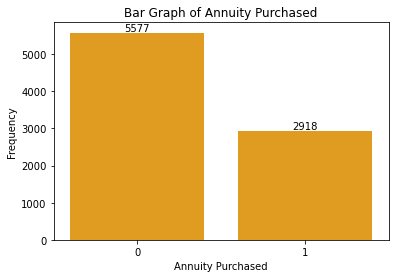

In [23]:
# Explore target variable
ins_counts = train['INS'].value_counts()

ax = sns.countplot(x = "INS", data = train, color = "orange")
ax.set(xlabel = 'Annuity Purchased',
       ylabel = 'Frequency',
       title = 'Bar Graph of Annuity Purchased')
for i, count in enumerate(ins_counts):
    ax.text(i, count, str(count), ha='center', va='bottom')
plt.show()

In [24]:
# Identify classes of variables: binary, ordinal, nominal, or continuous
bin_var = []
ord_var = []
nom_var = []
cont_var = []

for column in train.columns:
    if column == 'BRANCH' or column == 'RES':
        nom_var.append(column)
    elif train[column].nunique() == 2:
        bin_var.append(column)
    elif train[column].nunique() <= 10:
        ord_var.append(column)
    else:
        cont_var.append(column)

### Tests of Association (Existence)

**Null: The distribution of one variable does not change across levels of another variable (no association)**

**Alternative: The distribution of one variable changes across levels of another variable (association)**

* Pearson Chi-Square Test: Compare any two **categorical** variable
* Likelihood Ratio Chi-Square Test: Compare any two **categorical** variable
> * Assumption for both Chi-Square Tests: The sample size requirement is 80% or more of the cells in the cross-tabulation table need expected count larger than 5. (in Orange)
<img src="https://snipboard.io/mDlIAE.jpg" width="500" height="300">

* If the assumption above is not met, then run Fisher's Exact Test
* Fisher's Exact Test: Compare any two **categorical** variable that calculates all possible permutations of data
* Mantel-Haenszel Chi-Square Test: Compare any two **ordinal** variable



In [25]:
vars = {'P-Value': {}, 'Type': {}}

for column in train.columns:
    if column in bin_var:
        # Pearson Chi-Square Test (ideally would have done the MH Chi-Square Test, but no test in Python works well)
        _, pval, _, _ = chi2_contingency(pd.crosstab(index = train[column], columns = train['INS']), correction = True)
        vars['P-Value'][column] = pval
        vars['Type'][column] = 'Binary'
    elif column in ord_var:
        # Pearson Chi-Square Test (ideally would have done the MH Chi-Square Test, but no test in Python works well)
        _, pval, _, _ = chi2_contingency(pd.crosstab(index = train[column], columns = train['INS']), correction = True)
        vars['P-Value'][column] = pval
        vars['Type'][column] = 'Ordinal'
    elif column in cont_var:
        # Logistic Regression
        log_model = GLM.from_formula('INS ~ {}'.format(column), data = train, family = Binomial()).fit()
        pval = log_model.pvalues[1]
        vars['P-Value'][column] = pval
        vars['Type'][column] = 'Continuous'
    elif column in nom_var:
        # Pearson Chi-Square Test
        _, pval, _, _ = chi2_contingency(pd.crosstab(index = train[column], columns = train['INS']), correction = True)
        vars['P-Value'][column] = pval
        vars['Type'][column] = 'Nominal'

vars = pd.DataFrame(vars, index=train.columns)
vars = vars.sort_values(by=['Type', 'P-Value'], ascending=[True, True])

# Client currently uses 𝛼 = 0.002
vars = vars[vars['P-Value'] < 0.002]

vars

,P-Value,Type
INS,0.000000e+00,Binary
CD,5.614516e-78,Binary
DDA,9.074340e-70,Binary
MM,1.285409e-56,Binary
SAV,1.933161e-39,Binary
IRA,9.047201e-37,Binary
CC,3.224978e-32,Binary
ATM,2.063887e-29,Binary
INV,2.024394e-21,Binary
DIRDEP,4.330087e-11,Binary


### Tests of Association (Strength)

* Odds Ratio: Compare any two **binary** variable
* Cramer's V: Compare any two **categorical** variable where one or both variables have more than two categories (Closer to 0 -> Weaker relationship)
* Spearman's Correlation: Compare any two **ordinal** variable

In [26]:
# Odds ratio for the binary predictor variables
odds_ratio = vars[vars['Type'] == 'Binary'].copy()
odds_list = []

for column in odds_ratio.index:
    odds_list.append(fisher_exact(pd.crosstab(index = train[column], columns = train['INS']))[0])

odds_ratio['Odds_Ratio'] = odds_list

odds_ratio = odds_ratio.sort_values(by = 'Odds_Ratio', ascending = False)

odds_ratio = odds_ratio.iloc[1:] # removes the target variable which is at index 0

odds_ratio

,P-Value,Type,Odds_Ratio
INV,2.024394e-21,Binary,3.472039
CD,5.614516e-78,Binary,3.427187
IRA,9.047201e-37,Binary,3.184809
MM,1.285409e-56,Binary,2.850281
SAV,1.933161e-39,Binary,1.831167
CC,3.224978e-32,Binary,1.781347
SDB,5.425080e-10,Binary,1.549652
DIRDEP,4.330087e-11,Binary,0.711949
ATM,2.063887e-29,Binary,0.592997
INAREA,1.007576e-06,Binary,0.574577


### Missing Values

* Investigate each variable and identify the missing values
* Impute appropriately based on variable type
* Consider removing the variable entirely if more than 50% of observations is NA
* Create a binary flag variable

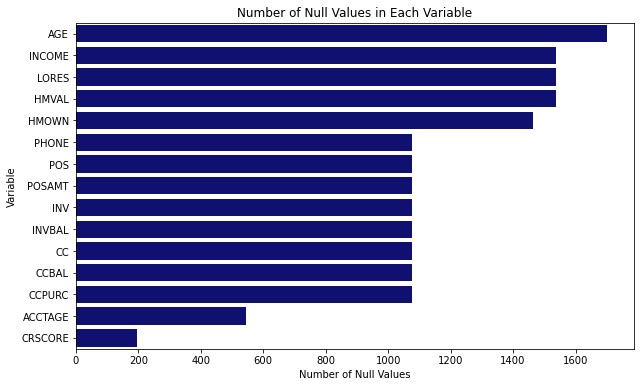

,Variable,Null_Count
13,AGE,1702
9,INCOME,1537
11,LORES,1537
12,HMVAL,1537
10,HMOWN,1463
1,PHONE,1075
2,POS,1075
3,POSAMT,1075
4,INV,1075
5,INVBAL,1075


In [27]:
#Find null values
var_with_null = {'Variable': [], 'Null_Count': []}

# Check all variables
for column in train.columns:
    null_count = train[column].isnull().sum()
    if null_count > 0:
        var_with_null['Variable'].append(column)
        var_with_null['Null_Count'].append(null_count)

var_with_null = pd.DataFrame(var_with_null).sort_values(by = 'Null_Count', ascending = False)

# Plot of the number of null values
plt.figure(figsize=(10, 6))
sns.barplot(x = 'Null_Count', y = 'Variable', data = var_with_null, color = 'navy')
plt.title('Number of Null Values in Each Variable')
plt.xlabel('Number of Null Values')
plt.ylabel('Variable')
plt.show()

var_with_null

In [28]:
# Further investigate the missing values

# Extract indices of the training dataset with missing values
missing_indices = train[train.isnull().any(axis=1)].index

# Subset of training dataset with missing values
train_missing = train.iloc[missing_indices]

# Calculate total count of missing values for each row
train_missing = train_missing.copy()   # Fixes SettingWithCopyWarning
train_missing['Total_NA'] = train_missing.isnull().sum(axis=1)

# Investigate which branch has the most missing values
train_missing.groupby('BRANCH')['Total_NA'].sum().sort_values(ascending = False)

BRANCH
B15    4901
B2     3890
B14    2307
B18    1359
B4     1121
B19     662
B3      495
B1      476
B5      437
B16     246
B7      231
B6      219
B8      210
B17     127
B9      120
B13     109
B12      74
B11      69
B10      64
Name: Total_NA, dtype: int64

In [29]:
# Continuous variables
for column in train.columns:
    null_count = train[column].isnull().sum()
    if null_count > 0 and column in vars[vars['Type'] == 'Continuous'].index:
        print(f"{column} (continuous and significant) has {null_count} null values")

train['PHONE_FLAG'] =  train['PHONE'].notna().astype(int) # Create binary indicator for PHONE
train['PHONE_FLAG'] = train['PHONE_FLAG'].fillna(0)
train['PHONE'].value_counts() # Impute with median = 0
train['PHONE'] = train['PHONE'].fillna(0)

train['POS_FLAG'] =  train['POS'].notna().astype(int) # Create binary indicator for POS
train['POS_FLAG'] = train['POS_FLAG'].fillna(0)
train['POS'].value_counts() # Impute with median = 0
train['POS'] = train['POS'].fillna(0)

train['HMVAL_FLAG'] =  train['HMVAL'].notna().astype(int) # Create binary indicator for HMVAL
train['HMVAL_FLAG'] = train['HMVAL_FLAG'].fillna(0)
train['HMVAL'].value_counts() # Impute with median = 107
train['HMVAL'] = train['HMVAL'].fillna(107)

PHONE (continuous and significant) has 1075 null values
POS (continuous and significant) has 1075 null values
HMVAL (continuous and significant) has 1537 null values


In [30]:
# Ordinal variables
for column in train.columns:
    null_count = train[column].isnull().sum()
    if null_count > 0 and column in vars[vars['Type'] == 'Ordinal'].index:
        print(f"{column} (ordinal and significant) has {null_count} null values")

train['CCPURC_FLAG'] =  train['CCPURC'].notna().astype(int) # Create binary indicator for CCPURC
train['CCPURC_FLAG'] = train['CCPURC_FLAG'].fillna(0)
train['CCPURC'].value_counts() # Impute with median = 0
train['CCPURC'] = train['CCPURC'].fillna(0)

CCPURC (ordinal and significant) has 1075 null values


In [31]:
# Nominal variables
for column in train.columns:
    null_count = train[column].isnull().sum()
    if null_count > 0 and column in vars[vars['Type'] == 'Nominal'].index:
        print(f"{column} (nominal and significant) has {null_count} null values")

In [32]:
# Binary variables
for column in train.columns:
    null_count = train[column].isnull().sum()
    if null_count > 0 and column in vars[vars['Type'] == 'Binary'].index:
        print(f"{column} (binary and significant) has {null_count} null values")

train['INV_FLAG'] =  train['INV'].notna().astype(int) # Create binary indicator for INV
train['INV_FLAG'] = train['INV_FLAG'].fillna(0)
train['INV'].value_counts() # Impute with mode = 0
train['INV'] = train['INV'].fillna(0)

train['CC_FLAG'] =  train['CC'].notna().astype(int) # Create binary indicator for CC
train['CC_FLAG'] = train['CC_FLAG'].fillna(0)
train['CC'].value_counts() # Impute with mode = 0
train['CC'] = train['CC'].fillna(0)

INV (binary and significant) has 1075 null values
CC (binary and significant) has 1075 null values


### Linearity Assumption

* Assumption: Continuous predictor variables are linearly related to the logit function (transformation of the probability of the target)
* Check this assumption through Generalized Additive Models (GAMs)

In [33]:
for column in train.columns:
    null_count = train[column].isnull().sum()
    if null_count > 0 and column in vars[vars['Type'] == 'Continuous'].index:
        print(f"{column} (continuous and significant) has {null_count} null values")

In [34]:
import statsmodels as sm

warnings.filterwarnings("ignore")

# Checking if continuous variables meet the linearity assumption through GAMS
linearity = vars[vars['Type'] == 'Continuous'].copy()
linearity_list = []

# Perform significance test for each continuous variable
for column in linearity.index:
    logit_model = GLM.from_formula('INS ~ {}'.format(column), data = train, family = Binomial()).fit()
    bs = BSplines(train[column], df = 5, degree = 3)
    gam_model = GLMGam.from_formula('INS ~ {}'.format(column), data = train, smoother = bs, family = sm.api.families.Binomial()).fit()

    # Value of the log-likelihood function (measure of how well the model explains the observed data)
    reduced_ll = logit_model.llf
    full_ll = gam_model.llf

    # Likelihood ratio (LR) statistic (null hypothesis: the reduced model is correct) and the p-value
    LR_statistic = -2*(reduced_ll-full_ll)
    p_val = sp.stats.chi2.sf(LR_statistic, 3)

    linearity_list.append(p_val)

linearity['gam_pval'] = linearity_list

linearity = linearity.sort_values(by = 'gam_pval', ascending = True)

linearity

# Given that most of the continuous variables' p-values fall under 𝛼 = 0.002, they cannot just be modeled linearly with the logit (does not meet the linearity assumption)
# Therefore, we need to find a way around this (i.e. strategically bin the continuous variables)

,P-Value,Type,gam_pval
SAVBAL,7.821353e-48,Continuous,3.139972e-52
DEPAMT,3.723522e-04,Continuous,1.420671e-50
DDABAL,1.994710e-23,Continuous,3.659410e-49
ATMAMT,5.847175e-08,Continuous,4.855730e-47
CDBAL,1.075611e-36,Continuous,4.799402e-22
DEP,2.312173e-38,Continuous,3.378504e-13
IRABAL,3.327586e-11,Continuous,4.629333e-09
CHECKS,1.924075e-11,Continuous,6.394856e-07
POS,6.217900e-07,Continuous,3.531236e-06
NSFAMT,1.347531e-04,Continuous,1.451592e-04
